In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math

## Import data

In [3]:
df = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
df.head(5)

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Examine

In [4]:
# Rename columns
df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df[df["class"] == 0]

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.807300,-0.44699,0
1,4.54590,8.16740,-2.458600,-1.46210,0
2,3.86600,-2.63830,1.924200,0.10645,0
3,3.45660,9.52280,-4.011200,-3.59440,0
4,0.32924,-4.45520,4.571800,-0.98880,0
...,...,...,...,...,...
757,2.66060,3.16810,1.961900,0.18662,0
758,3.93100,1.85410,-0.023425,1.23140,0
759,0.01727,8.69300,1.398900,-3.96680,0
760,3.24140,0.40971,1.401500,1.19520,0


In [7]:
df[df["class"] == 1]

,variance,skewness,curtosis,entropy,class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1


#### Note

* Slightly imbalanced dataset

In [8]:
df_stats_description = df.describe()

In [9]:
df_stats_description[df_stats_description["class"] == 1]

,variance,skewness,curtosis,entropy,class
75%,2.821475,6.814625,3.17925,0.39481,1.0
max,6.824800,12.951600,17.92740,2.44950,1.0


In [10]:
df_stats_description

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
df_stats_description_class0 = df[df["class"]==0].describe()
df_stats_description_class0

,variance,skewness,curtosis,entropy,class
count,762.000000,762.000000,762.000000,762.000000,762.0
mean,2.276686,4.256627,0.796718,-1.147640,0.0
std,2.019348,5.138792,3.239894,2.125077,0.0
min,-4.285900,-6.932100,-4.941700,-8.548200,0.0
25%,0.883345,0.450063,-1.709700,-2.228250,0.0
50%,2.553100,5.668800,0.700605,-0.552380,0.0
75%,3.884450,8.691975,2.652925,0.423257,0.0
max,6.824800,12.951600,8.829400,2.449500,0.0


In [12]:
df_stats_description_class1 = df[df["class"]==1].describe()
df_stats_description_class1

,variance,skewness,curtosis,entropy,class
count,610.000000,610.000000,610.000000,610.000000,610.0
mean,-1.868443,-0.993576,2.148271,-1.246641,1.0
std,1.881183,5.404884,5.261811,2.070984,0.0
min,-7.042100,-13.773100,-5.286100,-7.588700,1.0
25%,-3.061450,-5.810025,-1.357500,-2.458375,1.0
50%,-1.806100,0.172775,0.373720,-0.661650,1.0
75%,-0.541770,3.189275,5.626350,0.341790,1.0
max,2.391700,9.601400,17.927400,2.135300,1.0


### Plot 1: Boxplot

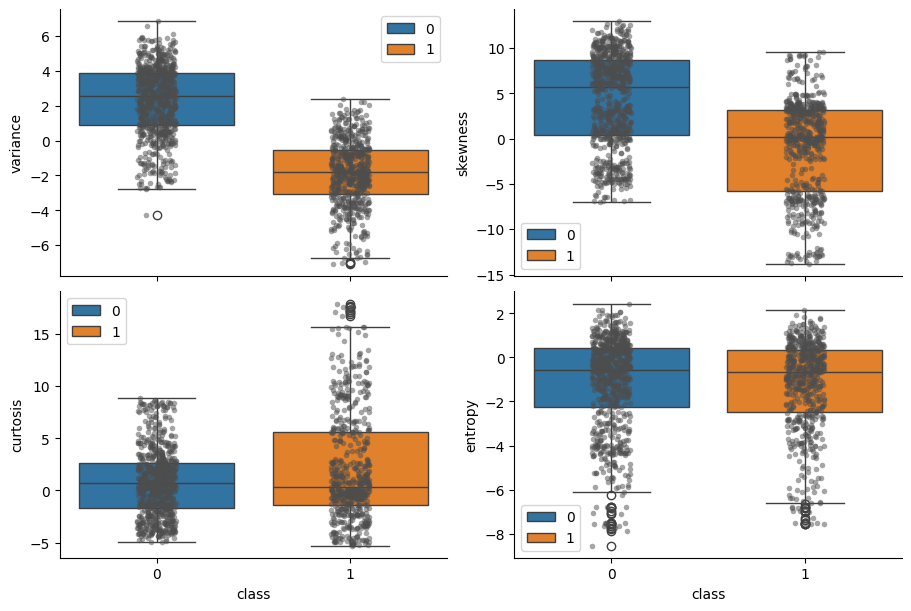

In [13]:
fig1, ax1 = plt.subplots(2,2, figsize=(9,6), constrained_layout=True, sharex=True)
ax1 = ax1.flatten()

[sns.boxplot(df, x="class", y=df.columns[i], hue="class", ax=ax1[i]) for i in range(len(ax1))]

# add points to show each observation
[sns.stripplot(df, x="class", y=df.columns[i], size=4, ax=ax1[i], color='0.3', alpha=0.5) for i in range(len(ax1))]

# ax.xaxis.grid(True)
# ax[0,0].set(xlabel="Genuine (1)/Forged (0) bank notes")
sns.despine()

In [14]:
fig1.get_size_inches()

array([9., 6.])

### Plot 2: Histogram

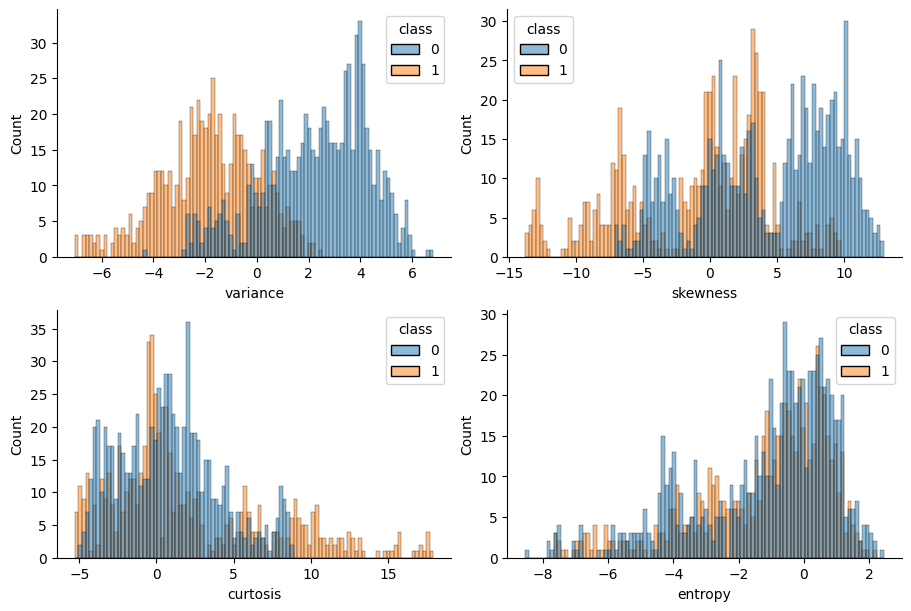

In [15]:
fig2, ax2 = plt.subplots(2,2, figsize=(9,6), constrained_layout=True)
ax2 = ax2.flatten()

[sns.histplot(df, x=df.columns[i], hue="class", ax=ax2[i], bins=100) for i in range(len(ax2))]

# ax.xaxis.grid(True)
# ax[0,0].set(xlabel="Genuine (1)/Forged (0) bank notes")
sns.despine()

## Transformation

In [16]:
from sklearn import preprocessing

In [19]:
random_seed = 0

### Train-Test split

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4].to_numpy(), df.iloc[:, -1].to_numpy(), 
                                                    test_size=0.25,
                                                    random_state=random_seed,
                                                    shuffle=True, 
                                                    stratify = df['class'].to_numpy()
                                                   )

In [26]:
y_test[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [27]:
y_train[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [28]:
np.bincount(y_test)

array([191, 152])

In [29]:
np.bincount(y_train)

array([571, 458])

In [30]:
X_train[:3]

array([[ 2.2546 ,  8.0992 , -0.24877, -3.2698 ],
       [ 1.5799 , -4.7076 ,  7.9186 , -1.5487 ],
       [ 3.6216 ,  8.6661 , -2.8073 , -0.44699]])

### Quantile Transformer

In [17]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=len(df),
                                                        random_state=random_seed,
                                                        output_distribution='uniform'
                                                        )

In [38]:
X_train_q_transformed = quantile_transformer.fit_transform(X_train)

/home/skesava/.cache/pypoetry/virtualenvs/uci-banknotes-classification-27EpHlaA-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1372) is greater than the total number of samples (1029). n_quantiles is set to n_samples.
  warnings.warn(


In [39]:
X_test_q_transformed = quantile_transformer.transform(X_test)

In [43]:
# checking the distribution
np.percentile(X_train_q_transformed, [0, 25, 50, 75, 100], axis=0)

array([[0.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.24951362],
       [0.5       , 0.5       , 0.49951362, 0.50097276],
       [0.75      , 0.75      , 0.75      , 0.75      ],
       [1.        , 1.        , 1.        , 1.        ]])

In [45]:
# confirming variance
np.percentile(X_train_q_transformed[:,3], [0, 25, 50, 75, 100], axis=0)

array([0.        , 0.24951362, 0.50097276, 0.75      , 1.        ])

In [46]:
# checking  test distribution
np.percentile(X_test_q_transformed, [0, 25, 50, 75, 100], axis=0)

array([[1.23497668e-03, 0.00000000e+00, 4.01098022e-03, 8.32653306e-04],
       [2.18419003e-01, 2.68253407e-01, 2.32208788e-01, 2.08604243e-01],
       [4.58895166e-01, 5.61185361e-01, 4.41958495e-01, 4.51969962e-01],
       [7.84607902e-01, 7.54523111e-01, 6.81818182e-01, 7.64712800e-01],
       [9.99652917e-01, 9.99341176e-01, 1.00000000e+00, 9.92217899e-01]])

#### Plot 3: Histogram

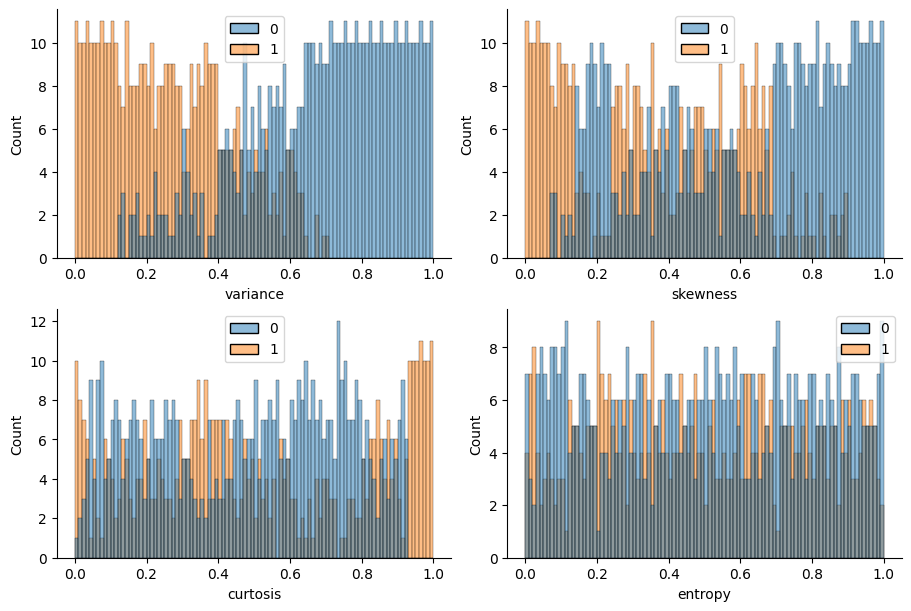

In [61]:
fig3, ax3 = plt.subplots(2,2, figsize=(9,6), constrained_layout=True)
ax3 = ax3.flatten()

[sns.histplot(x=X_train_q_transformed[:,i],  hue=y_train, ax=ax3[i], bins=100) for i in range(len(ax3))]
[ax3[i].set_xlabel(df.columns[i]) for i in range(len(ax3))]

# ax.xaxis.grid(True)
# ax[0,0].set(xlabel="Genuine (1)/Forged (0) bank notes")
sns.despine()

#### Note
* Distribution has become less Gaussian compared to the original

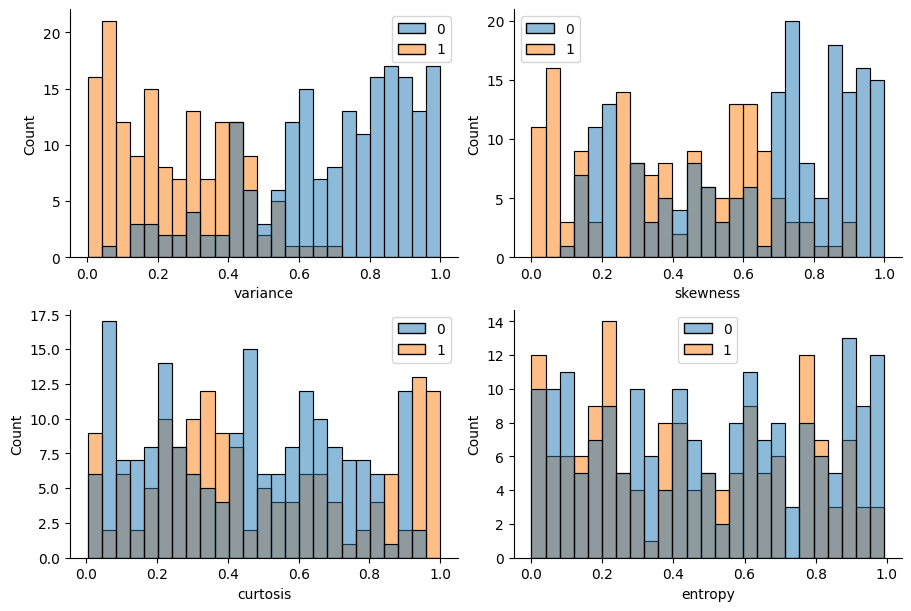

In [60]:
fig3b, ax3b = plt.subplots(2,2, figsize=(9,6), constrained_layout=True)
ax3b = ax3b.flatten()

[sns.histplot(x=X_test_q_transformed[:,i],  hue=y_test, ax=ax3b[i], bins=25) for i in range(len(ax3b))]
[ax3b[i].set_xlabel(df.columns[i]) for i in range(len(ax3b))]

# ax.xaxis.grid(True)
# ax[0,0].set(xlabel="Genuine (1)/Forged (0) bank notes")
sns.despine()

### Power Transform

In [62]:
power_transformer = preprocessing.PowerTransformer(method='yeo-johnson')

In [63]:
X_train_p_transformed = power_transformer.fit_transform(X_train)

In [64]:
power_transformer.lambdas_

array([1.03676253, 1.08587993, 0.7320765 , 1.55734649])

In [65]:
X_test_p_transformed = power_transformer.transform(X_test)

#### Plot 4: Histogram

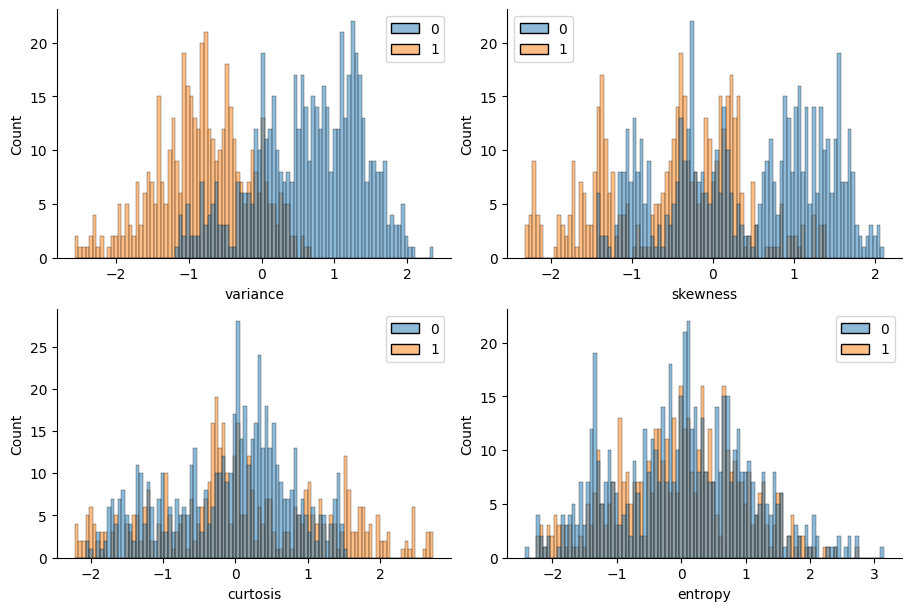

In [66]:
fig4, ax4 = plt.subplots(2,2, figsize=(9,6), constrained_layout=True)
ax4 = ax4.flatten()

[sns.histplot(x=X_train_p_transformed[:,i],  hue=y_train, ax=ax4[i], bins=100) for i in range(len(ax4))]
[ax4[i].set_xlabel(df.columns[i]) for i in range(len(ax4))]

sns.despine()

## TODO: Correlation heatmaps